In [1]:
from global_config import config

import matplotlib.pyplot as plt

from tqdm import tqdm
import pandas as pd
import xarray as xr
import numpy as np
import wget
import os

import cartopy.crs as ccrs
import rioxarray
import cartopy

# xarray version 2025.1.
# pandas version 2.2.3.
# numpy version 2.2.2.

def flatten_list(ls):
    return [item for sublist in ls for item in sublist]

data_dir = config.get_property('data_dir')
data_dir = os.path.join(data_dir, 'raw')

precip_data_dir = os.path.join(data_dir, 'precipitation')
CHRIPS_data_dir = os.path.join(precip_data_dir, "CHIRPS-2.0")


In [ ]:
url_precip  = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.CONUS/.v1p0/.REALTIME/.rain/T/monthlyAverage/dods'
precip_xarr = xr.open_dataset(url_precip, decode_times=False)
precip_xarr



<xarray.Dataset> Size: 31MB
Dimensions:  (T: 217, Y: 120, X: 300)
Coordinates:
  * T        (T) float32 868B 564.5 565.5 566.5 567.5 ... 778.5 779.5 780.5
  * Y        (Y) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * X        (X) float32 1kB -129.9 -129.6 -129.4 ... -55.62 -55.38 -55.12
Data variables:
    rain     (T, Y, X) float32 31MB ...
Attributes:
    Conventions:  IRIDL

In [ ]:
precip_xarr["rain"].shape

http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.CONUS/.v1p0/.REALTIME/.rain/data.nc

(217, 120, 300)

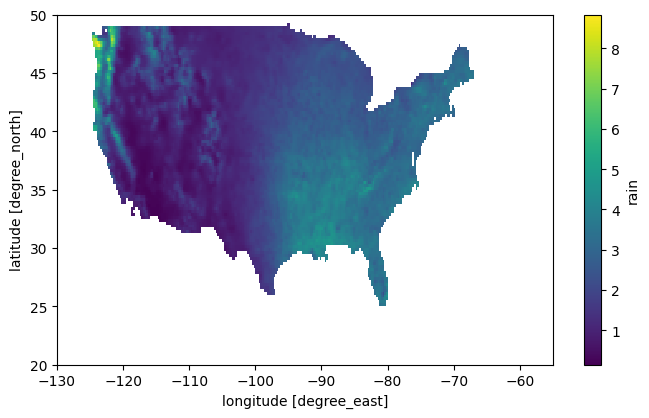

In [4]:
plt.figure(figsize=(8, 10))
plt.subplot(211)

precip_xarr.rain.mean(dim='T').plot()

In [ ]:
url_precip2  = "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.CONUS/.v1p0/.REALTIME/.rain/dods"
precip_xarr2 = xr.open_dataset(url_precip, decode_times=False)
precip_xarr2


<xarray.Dataset> Size: 31MB
Dimensions:  (T: 217, Y: 120, X: 300)
Coordinates:
  * T        (T) float32 868B 564.5 565.5 566.5 567.5 ... 778.5 779.5 780.5
  * Y        (Y) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * X        (X) float32 1kB -129.9 -129.6 -129.4 ... -55.62 -55.38 -55.12
Data variables:
    rain     (T, Y, X) float32 31MB ...
Attributes:
    Conventions:  IRIDL

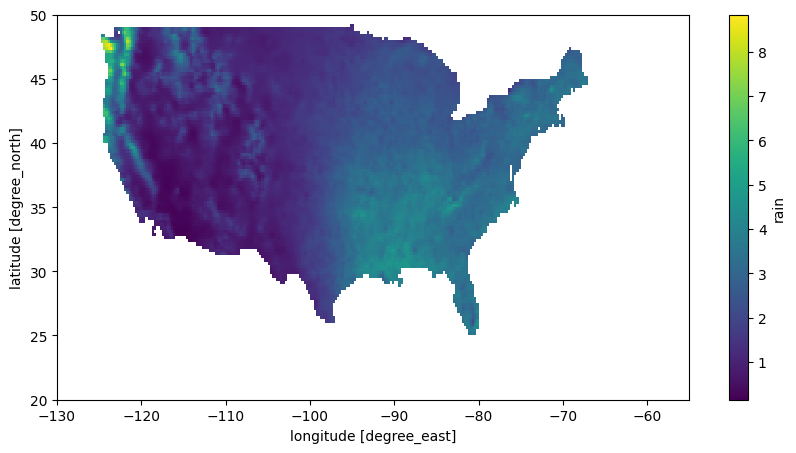

In [9]:
fig, ax = plt.subplots(figsize=(10.2, 5))

precip_xarr2.rain.mean(dim='T').plot(ax=ax)

In [19]:
url_precip3       = "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/dods"
precip_xarrglobal = xr.open_dataset(url_precip3, decode_times=False)
precip_xarrglobal.load()


IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [ ]:
mean_time = np.nanmean(precip_xarrglobal["rain"], axis=(0))


IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

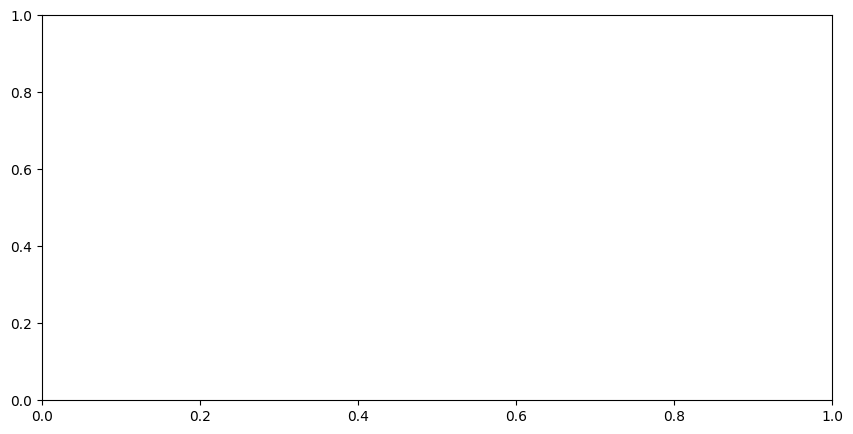

In [13]:
fig, ax = plt.subplots(figsize=(10.2, 5))

precip_xarrglobal.rain.mean(dim='T').plot(ax=ax)